In [51]:
import pandas as pd
sub_df = pd.read_parquet('../data/curated/2018_11_sc.parquet')
sub_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount
0,2018-11-01 00:51:36,2018-11-01 00:52:36,0.0,2,2.5,0.00,3.80
1,2018-11-01 00:07:47,2018-11-01 00:21:43,2.3,1,11.0,2.45,14.75
2,2018-11-01 00:24:27,2018-11-01 00:34:29,1.8,2,8.5,0.00,9.80
3,2018-11-01 00:35:27,2018-11-01 00:47:02,2.3,1,10.0,3.35,14.65
4,2018-11-01 00:16:46,2018-11-01 00:22:50,1.0,2,6.0,0.00,7.30


In [52]:
sub_df.isnull().sum()
## .dropna/ replace to fix null values

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
payment_type             0
fare_amount              0
tip_amount               0
total_amount             0
dtype: int64

In [53]:
sub_df.trip_distance.max()

932.9

In [54]:
# clean for trip distance 
sub_df = sub_df[sub_df.trip_distance > 0]
sub_df.shape

(8096271, 7)

In [55]:
# payment_type 
sub_df["payment_type"].value_counts(ascending=True)

5          1
0       9691
4      11020
3      33245
2    2351139
1    5691175
Name: payment_type, dtype: int64

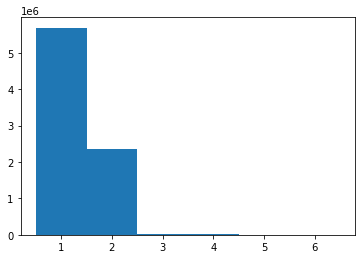

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(sub_df.payment_type, bins=6, range=(1, 7), align='left')
plt.show()
### Since the other three types do not meet 0.5% of population, we can basically ignore these data

In [57]:
sub_df = sub_df[(sub_df['payment_type'] == 1) | (sub_df['payment_type'] == 2)]
sub_df.shape

(8042314, 7)

In [58]:
sub_df.describe()

,trip_distance,payment_type,fare_amount,tip_amount,total_amount
count,8.042314e+06,8.042314e+06,8.042314e+06,8.042314e+06,8.042314e+06
mean,2.948053e+00,1.292346e+00,1.332793e+01,1.933075e+00,1.673775e+01
std,3.840958e+00,4.548405e-01,6.710204e+01,2.660933e+00,6.764159e+01
min,1.000000e-02,1.000000e+00,-7.700000e+01,0.000000e+00,-9.080000e+01
25%,9.700000e-01,1.000000e+00,6.500000e+00,0.000000e+00,8.760000e+00
50%,1.600000e+00,1.000000e+00,9.500000e+00,1.460000e+00,1.230000e+01
75%,3.000000e+00,2.000000e+00,1.500000e+01,2.500000e+00,1.835000e+01
max,9.329000e+02,2.000000e+00,1.874365e+05,9.459700e+02,1.874378e+05


In [59]:
sub_df = sub_df[sub_df.fare_amount >= 2.5]
sub_df = sub_df[sub_df.tip_amount >= 0]
sub_df.shape

(8041134, 7)

In [60]:
sub_df.describe()

,trip_distance,payment_type,fare_amount,tip_amount,total_amount
count,8.041134e+06,8.041134e+06,8.041134e+06,8.041134e+06,8.041134e+06
mean,2.947553e+00,1.292260e+00,1.333085e+01,1.932798e+00,1.674039e+01
std,3.839485e+00,4.548010e-01,6.710633e+01,2.653567e+00,6.764548e+01
min,1.000000e-02,1.000000e+00,2.500000e+00,0.000000e+00,2.500000e+00
25%,9.700000e-01,1.000000e+00,6.500000e+00,0.000000e+00,8.760000e+00
50%,1.600000e+00,1.000000e+00,9.500000e+00,1.460000e+00,1.230000e+01
75%,3.000000e+00,2.000000e+00,1.500000e+01,2.500000e+00,1.835000e+01
max,9.329000e+02,2.000000e+00,1.874365e+05,9.459700e+02,1.874378e+05


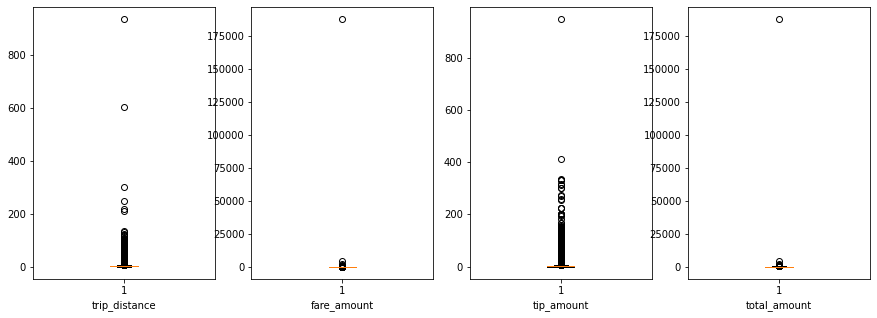

In [62]:
# boxplot of three numerical values
cols = ['trip_distance', 'fare_amount', 'tip_amount','total_amount']
fig, axs = plt.subplots(1, 4, figsize=(15,5))
for i in range(4):
    axs[i].boxplot(sub_df[cols[i]])
    axs[i].set_xlabel(cols[i])
plt.show()

In [69]:
sub_df[sub_df.total_amount > 400].sort_values(by=['total_amount'])

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount
4230418,2018-11-15 21:53:13,2018-11-16 00:30:38,83.20,1,400.00,0.00,400.30
6019379,2018-11-22 16:44:55,2018-11-22 16:50:58,0.78,1,400.00,0.00,400.30
1614833,2018-11-06 17:01:53,2018-11-06 18:56:45,65.67,1,360.00,40.00,400.80
5385247,2018-11-20 01:47:25,2018-11-20 05:03:54,101.00,1,400.00,0.00,400.80
4204321,2018-11-15 18:14:37,2018-11-15 22:33:32,22.58,1,164.00,225.00,400.80
5991083,2018-11-22 13:21:49,2018-11-22 15:06:53,74.27,1,334.00,66.96,401.76
1203956,2018-11-05 07:22:25,2018-11-05 08:34:11,51.14,1,312.00,67.06,402.36
1845483,2018-11-07 13:20:40,2018-11-07 13:21:13,80.90,1,385.00,20.00,405.30
6242899,2018-11-23 19:59:27,2018-11-23 22:11:13,68.70,2,406.25,0.00,406.55
4256281,2018-11-16 01:15:27,2018-11-16 01:19:09,98.54,1,385.00,0.00,407.82


In [48]:
# manually checking the extreme values
sub_df[sub_df.trip_distance > 200]
# over 300 miles are not realistic in 2018.11 data

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount
2377881,2018-11-09 09:32:56,2018-11-09 09:43:49,932.90,1,11.5,2.95,14.75
2627361,2018-11-10 01:22:28,2018-11-10 06:03:37,210.13,2,480.0,0.00,486.56
2923686,2018-11-11 00:40:37,2018-11-11 00:45:13,300.60,1,5.0,1.26,7.56
5452615,2018-11-20 10:27:33,2018-11-20 11:01:52,603.60,1,21.5,4.45,26.75
5906501,2018-11-21 22:17:45,2018-11-22 02:18:47,218.87,2,300.0,0.00,300.80
7255883,2018-11-28 04:26:05,2018-11-28 04:29:44,246.90,2,1299.5,0.00,1300.80


In [49]:
sub_df[sub_df.fare_amount > 500]
# over 1300 USD are not realistic in 2018.11 data, however most of data over fare_amount of 500 USD is not realistic
# hence, we will delete all data over 500USD

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount
920293,2018-11-04 00:17:19,2018-11-04 01:54:41,115.0,2,501.00,0.0,512.80
1243701,2018-11-05 10:35:17,2018-11-05 10:41:28,0.8,2,2006.00,0.0,2006.80
2321141,2018-11-09 00:48:26,2018-11-09 00:49:09,0.1,2,650.00,0.0,650.30
5382046,2018-11-20 00:54:54,2018-11-20 00:58:02,0.8,2,4004.50,0.0,4005.80
5932380,2018-11-22 02:41:09,2018-11-22 02:42:35,0.3,2,187436.46,0.0,187437.76
7255883,2018-11-28 04:26:05,2018-11-28 04:29:44,246.9,2,1299.50,0.0,1300.80


In [50]:
sub_df[sub_df.tip_amount > 200]
# delete all tip amount over 230 USD

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount
30909,2018-11-01 05:26:23,2018-11-01 05:34:20,2.68,1,9.5,336.66,347.46
785231,2018-11-03 15:30:56,2018-11-03 15:37:54,0.89,1,6.0,312.29,319.09
1451741,2018-11-06 03:44:47,2018-11-06 04:09:43,7.10,1,24.5,260.00,285.80
2409840,2018-11-09 11:44:33,2018-11-09 12:06:40,2.18,1,15.0,255.50,271.30
2944360,2018-11-11 01:16:02,2018-11-11 01:28:26,2.21,1,10.0,411.00,422.30
2985383,2018-11-11 08:32:52,2018-11-11 08:52:49,3.48,1,15.5,331.17,347.47
3604436,2018-11-13 16:49:35,2018-11-13 16:52:04,0.63,1,4.0,300.00,305.80
4037826,2018-11-15 02:18:56,2018-11-15 02:38:04,8.02,1,25.0,333.00,359.30
4204321,2018-11-15 18:14:37,2018-11-15 22:33:32,22.58,1,164.0,225.00,400.80
4469262,2018-11-16 18:02:15,2018-11-16 18:02:19,0.80,1,2.5,270.00,274.30


In [11]:
# continuous cleaning
sub_df = sub_df[(sub_df.trip_distance <= 200) & (sub_df.fare_amount <= 500) & (sub_df.tip_amount <= 230) ]
sub_df.shape

(8041109, 7)

In [12]:
Q0 = sub_df[cols].quantile(0.05)
Q1 = sub_df[cols].quantile(0.25)
Q3 = sub_df[cols].quantile(0.75)
Q4 = sub_df[cols].quantile(0.95)
IQR = Q3 - Q1

In [13]:
# Remove outliers by 1.5IQR
removed_df = sub_df[((sub_df[cols] >= (Q1 - 1.5 * IQR)) & (sub_df[cols] <= (Q3 + 1.5 * IQR))).all(axis=1)]
removed_df.describe()

,trip_distance,payment_type,fare_amount,tip_amount,total_amount
count,7.042446e+06,7.042446e+06,7.042446e+06,7.042446e+06,7.042446e+06
mean,1.764425e+00,1.301034e+00,9.864269e+00,1.418865e+00,1.239918e+01
std,1.195629e+00,4.587074e-01,4.647208e+00,1.310046e+00,5.393342e+00
min,1.000000e-02,1.000000e+00,2.500000e+00,0.000000e+00,2.500000e+00
25%,9.000000e-01,1.000000e+00,6.500000e+00,0.000000e+00,8.300000e+00
50%,1.400000e+00,1.000000e+00,9.000000e+00,1.350000e+00,1.116000e+01
75%,2.300000e+00,2.000000e+00,1.250000e+01,2.200000e+00,1.535000e+01
max,6.040000e+00,2.000000e+00,2.770000e+01,6.250000e+00,7.000000e+01


In [14]:
# boxplots after basic data cleaning
cols = ['trip_distance', 'fare_amount', 'tip_amount','total_amount']
fig, axs = plt.subplots(1, 4, figsize=(15,5))
for i in range(4):
    axs[i].boxplot(removed_df[cols[i]])
    axs[i].set_xlabel(cols[i])
plt.show()

NameError: name 'plt' is not defined

In [15]:
# Filling tips amounts for credit cash payment
# calculate average percentage of tip amount 
card_pmt = removed_df.loc[removed_df['payment_type'] == 1, ['tip_amount','total_amount']]
tip_rate = (card_pmt.tip_amount/card_pmt.total_amount).mean()
tip_rate

0.15347199636515244

In [17]:
removed_df.loc[removed_df['payment_type'] == 2, 'tip_amount'] = removed_df['total_amount'] * tip_rate

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount
1,2018-11-01 00:07:47,2018-11-01 00:21:43,2.30,1,11.0,2.450000,14.75
2,2018-11-01 00:24:27,2018-11-01 00:34:29,1.80,2,8.5,1.504026,9.80
3,2018-11-01 00:35:27,2018-11-01 00:47:02,2.30,1,10.0,3.350000,14.65
4,2018-11-01 00:16:46,2018-11-01 00:22:50,1.00,2,6.0,1.120346,7.30
5,2018-11-01 00:23:57,2018-11-01 00:34:29,2.10,2,9.0,1.580762,10.30
...,...,...,...,...,...,...,...
8145582,2018-11-30 23:05:31,2018-11-30 23:09:49,0.70,1,5.0,1.250000,7.55
8145583,2018-11-30 23:14:35,2018-11-30 23:29:38,1.62,1,10.5,0.500000,12.30
8145584,2018-11-30 23:40:47,2018-12-01 00:06:37,2.58,1,17.0,3.660000,21.96
8145585,2018-11-30 23:00:34,2018-11-30 23:05:18,0.94,1,5.5,1.360000,8.16


In [32]:
removed_df['cashtip'] = removed_df['tip_amount'] * (removed_df['payment_type']-1)
removed_df['total_adjusted_amount'] = removed_df['cashtip']+ removed_df['total_amount']
# removed_df = removed_df.drop(['cashtip'], axis=1)
removed_df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount,cashtip,total_adjusted_amount
1,2018-11-01 00:07:47,2018-11-01 00:21:43,2.30,1,11.0,2.450000,14.75,0.000000,14.750000
2,2018-11-01 00:24:27,2018-11-01 00:34:29,1.80,2,8.5,1.504026,9.80,1.504026,11.304026
3,2018-11-01 00:35:27,2018-11-01 00:47:02,2.30,1,10.0,3.350000,14.65,0.000000,14.650000
4,2018-11-01 00:16:46,2018-11-01 00:22:50,1.00,2,6.0,1.120346,7.30,1.120346,8.420346
5,2018-11-01 00:23:57,2018-11-01 00:34:29,2.10,2,9.0,1.580762,10.30,1.580762,11.880762
...,...,...,...,...,...,...,...,...,...
8145582,2018-11-30 23:05:31,2018-11-30 23:09:49,0.70,1,5.0,1.250000,7.55,0.000000,7.550000
8145583,2018-11-30 23:14:35,2018-11-30 23:29:38,1.62,1,10.5,0.500000,12.30,0.000000,12.300000
8145584,2018-11-30 23:40:47,2018-12-01 00:06:37,2.58,1,17.0,3.660000,21.96,0.000000,21.960000
8145585,2018-11-30 23:00:34,2018-11-30 23:05:18,0.94,1,5.5,1.360000,8.16,0.000000,8.160000


In [34]:
# Calculating income rate as income 
removed_df['income_rate'] = removed_df['total_adjusted_amount'] / removed_df['trip_distance']

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [35]:
removed_df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,tip_amount,total_amount,cashtip,total_adjusted_amount,income_rate
1,2018-11-01 00:07:47,2018-11-01 00:21:43,2.30,1,11.0,2.450000,14.75,0.000000,14.750000,6.413043
2,2018-11-01 00:24:27,2018-11-01 00:34:29,1.80,2,8.5,1.504026,9.80,1.504026,11.304026,6.280014
3,2018-11-01 00:35:27,2018-11-01 00:47:02,2.30,1,10.0,3.350000,14.65,0.000000,14.650000,6.369565
4,2018-11-01 00:16:46,2018-11-01 00:22:50,1.00,2,6.0,1.120346,7.30,1.120346,8.420346,8.420346
5,2018-11-01 00:23:57,2018-11-01 00:34:29,2.10,2,9.0,1.580762,10.30,1.580762,11.880762,5.657506
...,...,...,...,...,...,...,...,...,...,...
8145582,2018-11-30 23:05:31,2018-11-30 23:09:49,0.70,1,5.0,1.250000,7.55,0.000000,7.550000,10.785714
8145583,2018-11-30 23:14:35,2018-11-30 23:29:38,1.62,1,10.5,0.500000,12.30,0.000000,12.300000,7.592593
8145584,2018-11-30 23:40:47,2018-12-01 00:06:37,2.58,1,17.0,3.660000,21.96,0.000000,21.960000,8.511628
8145585,2018-11-30 23:00:34,2018-11-30 23:05:18,0.94,1,5.5,1.360000,8.16,0.000000,8.160000,8.680851
